In [237]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [238]:
methods = ['No_Deconv', 'FPFS',
           'Tikhonet_Laplacian', 'ShapeNet', 
           'Richard-Lucy(10)', 'Richard-Lucy(20)', 
           'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
           'Unrolled_ADMM_Gaussian(2)', 'Unrolled_ADMM_Gaussian(4)', 'Unrolled_ADMM_Gaussian(8)']
snrs = [20, 40, 100]
texts = ['(10)', '(20)', '(30)', '(50)', '(100)', '(2)', '(4)', '(8)']


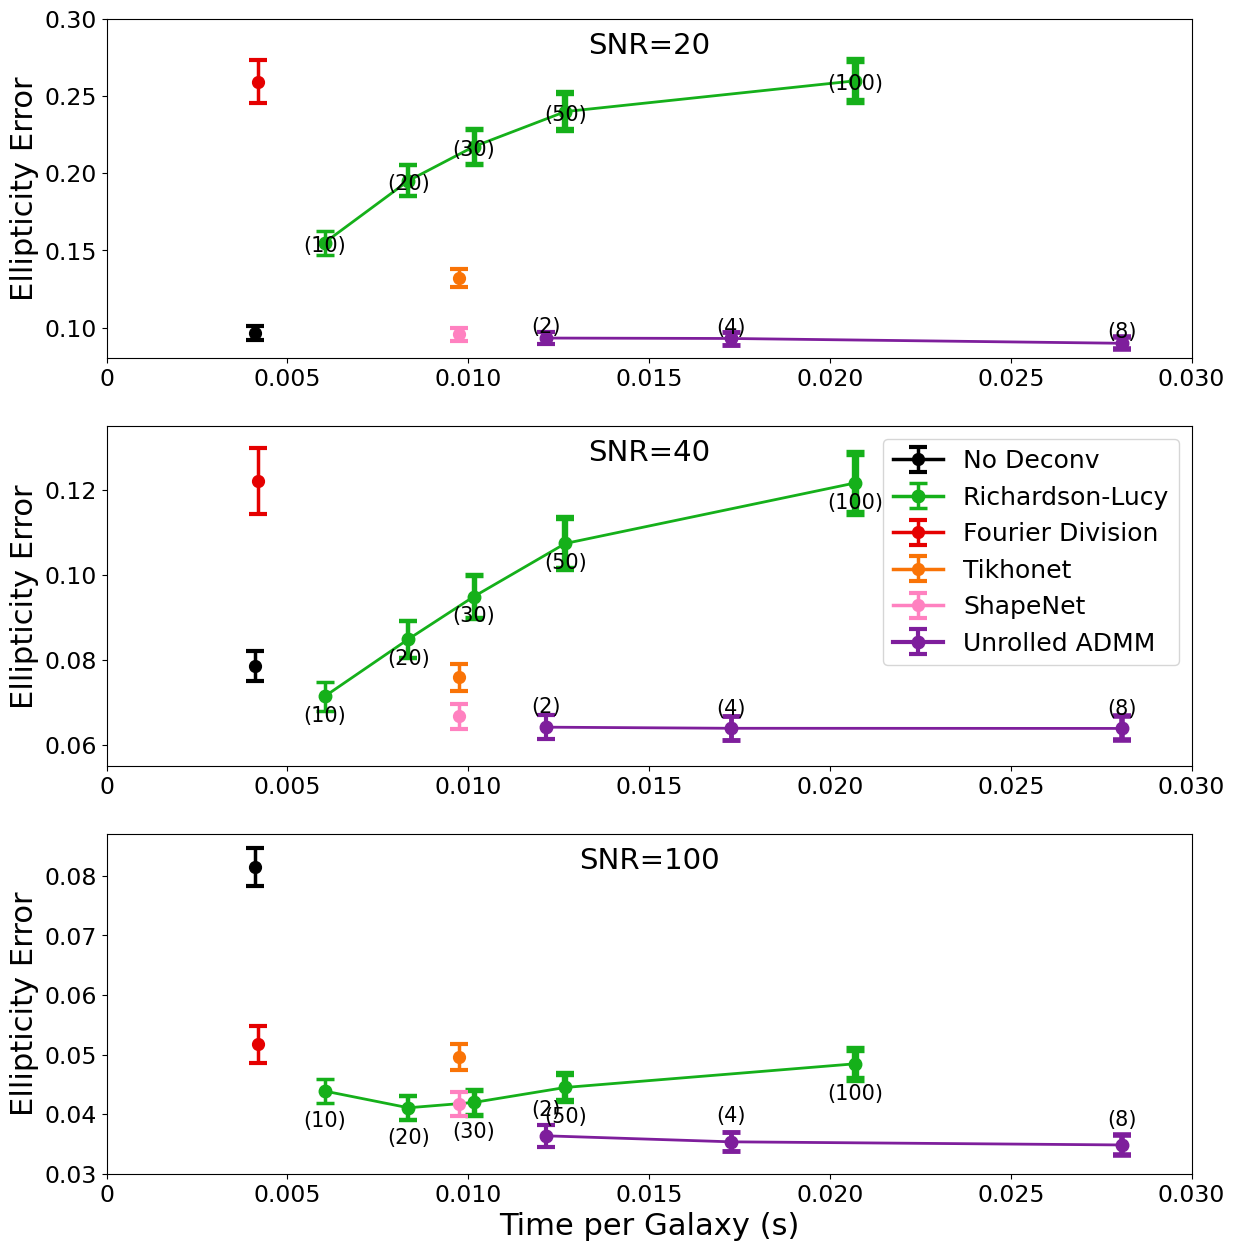

In [239]:
fig = plt.figure(figsize=(14,15), facecolor='white')
for idx, snr in enumerate(snrs):
    ax1 = plt.subplot(3,1,idx+1)
    shear_err_1, shear_err_2, g_errs, g_stds, g_sems, ts = [], [], [], [], [], []
    for method in methods:
        results_file = os.path.join('../results', method, f'results.json')
        with open(results_file, 'r') as f:
            results = json.load(f)
        gt_shear = np.array(results[str(snr)]['gt_shear'])
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        total_time, n_gal = results['time']
        ts.append(total_time/n_gal)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
        g_sems.append(np.std(rec_err[:,2])/np.sqrt(np.shape(rec_err)[0]))

    errscale = 5
        
    ax1.errorbar(ts[0:1], g_errs[0:1], yerr=np.multiply(errscale,g_sems[0:1]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[0]), label=get_label(methods[0]))
    
    ax1.plot(ts[4:9], g_errs[4:9], linewidth=2, color=get_color('Richard-Lucy'))
    for k, (t, g_err, g_sem) in enumerate(zip(ts[4:9], g_errs[4:9], g_sems[4:9])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color=get_color('Richard-Lucy'), label=get_label('Richard-Lucy'))
        else:
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color=get_color('Richard-Lucy'))
            
    ax1.errorbar(ts[1:2], g_errs[1:2], yerr=np.multiply(errscale,g_sems[1:2]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[1]), label=get_label(methods[1]))
    ax1.errorbar(ts[2:3], g_errs[2:3], yerr=np.multiply(errscale,g_sems[2:3]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[2]), label=get_label(methods[2]))
    ax1.errorbar(ts[3:4], g_errs[3:4], yerr=np.multiply(errscale,g_sems[3:4]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(methods[3]), label=get_label(methods[3]))
            
    ax1.plot(ts[9:12], g_errs[9:12], linewidth=2, color=get_color('Unrolled_ADMM_Gaussian'))
    for k, (t, g_err, g_sem) in enumerate(zip(ts[9:12], g_errs[9:12], g_sems[9:12])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color=get_color('Unrolled_ADMM_Gaussian'), label=get_label('Unrolled_ADMM_Gaussian'))
        else:
            ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color=get_color('Unrolled_ADMM_Gaussian'))
   
    for k, (t, g_err, text) in enumerate(zip(ts[4:], g_errs[4:], texts)):
        bias_y = -0.006 if k<=4 else 0.0033
        ax1.text(t, g_err+bias_y, text, fontsize=15, horizontalalignment='center')

    ax1.set_xlim([0, 0.03])
    # ax1.set_yscale('log')
    ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
    ax1.set_xticklabels(['0', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030'])
    ax1.set_title(f'SNR={snr}', y=1.0, pad=-25, fontsize=21)
    ax1.set_ylabel('Ellipticity Error', fontsize=22)
    
    if idx == 0:
        ax1.set_ylim([0.08, 0.3])
        ax1.set_yticks([0.1, 0.15, 0.2, 0.25, 0.3])
        ax1.set_yticklabels(['0.10', '0.15', '0.20', '0.25', '0.30'])
    elif idx == 1:
        ax1.legend(fontsize=18)
        ax1.set_ylim([0.055, 0.135])
        ax1.set_yticks([0.06, 0.08, 0.1, 0.12])
        ax1.set_yticklabels(['0.06', '0.08', '0.10', '0.12'])
    elif idx == 2:
        ax1.set_ylim([0.03, 0.087])
        ax1.set_yticks([0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
        ax1.set_yticklabels(['0.03', '0.04', '0.05', '0.06', '0.07', '0.08'])
        ax1.set_xlabel('Time per Galaxy (s)', fontsize=22)
    plt.tick_params(labelsize=17)
    
# plt.savefig('error_time.eps', bbox_inches='tight')
# plt.savefig('error_time.jpg', bbox_inches='tight')

In [240]:
# methods = ['No_Deconv', 'FPFS',
#            'Richard-Lucy(10)', 'Richard-Lucy(20)', 
#            'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
#            'Unrolled_ADMM(1)', 'Unrolled_ADMM(2)', 'Unrolled_ADMM(4)', 'Unrolled_ADMM(8)']
# snrs = [100, 20, 10]
# y_lims = {'100':[0, 0.23], '20':[0, 0.25], '10':[0, 0.5]}
# text_bias = {'100':[(0.0035, -1.1e-3), (-0.0085, -5e-4), 
#                     (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
#                     (-0.0013, -6e-3), (-0.008, -2.5e-3), (-0.008, -0.6e-3), (-0.008, -2e-3)],
#              '20':[(0.003, 0), (0.003, -1.1e-3), 
#                    (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
#                    (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)],
#              '10':[(-0.015, -1.1e-3), (0.005, -5e-4), 
#                    (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
#                    (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]}
# texts = ['(10)', '(20)', '(30)', '(50)', '(100)', '(1)', '(2)', '(4)', '(8)']


In [241]:
# fig = plt.figure(figsize=(14,15), facecolor='white')
# for idx, snr in enumerate(snrs):
#     ax1 = plt.subplot(3,1,idx+1)
#     shear_err_1, shear_err_2, g_errs, g_stds, g_sems, ts = [], [], [], [], [], []
#     for method in methods:
#         results_file = os.path.join('../results', method, f'results.json')
#         with open(results_file, 'r') as f:
#             results = json.load(f)
#         if method == 'No_Deconv':
#             gt_shear = np.array(results[str(snr)]['gt_shear'])
#         total_time, n_gal = results['time']
#         rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#         ts.append(total_time/n_gal)
#         g_errs.append(np.mean(rec_err[:,2]))
#         g_stds.append(np.std(rec_err[:,2]))
#         g_sems.append(np.std(rec_err[:,2])/np.sqrt(np.shape(rec_err)[0]))

#     errscale = 10
        
#     ax1.errorbar(ts[0:1], g_errs[0:1], yerr=np.multiply(errscale,g_sems[0:1]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color='black', label='No Deconvolution')
#     ax1.errorbar(ts[1:2], g_errs[1:2], yerr=np.multiply(errscale,g_sems[1:2]), linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color='xkcd:red', label='Fourier Division')
    
#     ax1.plot(ts[4:9], g_errs[4:9], linewidth=2, color='xkcd:green')
#     for k, (t, g_err, g_sem) in enumerate(zip(ts[4:9], g_errs[4:9], g_sems[4:9])):
#         if k == 0 :
#             ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color='xkcd:green', label='Richardson-Lucy')
#         else:
#             ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.7*k, capsize=6.5, capthick=2.5+0.7*k, marker='o', markersize = 9, color='xkcd:green')
            
#     ax1.plot(ts[9:12], g_errs[9:12], linewidth=2, color='xkcd:blue')
#     for k, (t, g_err, g_sem) in enumerate(zip(ts[9:12], g_errs[9:12], g_sems[9:12])):
#         if k == 0 :
#             ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color='xkcd:blue', label='Unrolled ADMM')
#         else:
#             ax1.errorbar(t, g_err, yerr=np.multiply(errscale,g_sem), linewidth=2.5+0.5*(k+1), capsize=6.5, capthick=2.5+0.5*(k+1), marker='o', markersize = 9, color='xkcd:blue')
   
#     bias = np.array(text_bias[str(snr)][2:])
#     for k, (t, g_err, text, bias_y, bias_x) in enumerate(zip(ts[2:], g_errs[2:], texts, bias[:,0], bias[:,1])):
#         bias_x = -9.5e-4 if k<4 else (-1.2e-3 if k==4 else -7e-4)
#         bias_y = (0.005 if k<=4 else (-0.0033 if k==8 else -0.003)) if idx<2 else (0.005 if k<=4 else -0.008)
#         ax1.text(t+bias_x, g_err+bias_y, text, fontsize=15)

#     ax1.set_xlim([0, 0.02])
#     ax1.set_yscale('log')
#     ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
#     ax1.set_xticklabels(['0', '0.005', '0.010', '0.015', '0.020'])
#     ax1.set_title(f'SNR={snr}', y=1.0, pad=-25, fontsize=21)
#     ax1.set_ylabel('Ellipticity Error', fontsize=22)
    
#     if idx == 0:
#         ax1.legend(fontsize=19)
#         ax1.set_ylim([0.02, 0.2])
#         ax1.set_yticks([0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2])
#         ax1.set_yticklabels(['0.02', '0.03', '0.04', '0.06', '0.08', '0.10', '0.15', '0.20'])
#     elif idx == 1:
#         ax1.set_ylim([0.046, 0.2])
#         ax1.set_yticks([0.05, 0.06, 0.08, 0.1, 0.15, 0.2])
#         ax1.set_yticklabels(['0.05', '0.06', '0.08', '0.10', '0.15', '0.20'])
#     elif idx == 2:
#         ax1.set_ylim([0.07, 0.3])
#         ax1.set_yticks([0.08, 0.1, 0.15, 0.2, 0.3])
#         ax1.set_yticklabels(['0.08', '0.10', '0.15', '0.20', '0.30'])
#         ax1.set_xlabel('Time per Galaxy (s)', fontsize=22)
#     plt.tick_params(labelsize=17)
    
# plt.savefig('error_time.eps', bbox_inches='tight')
# plt.savefig('error_time.jpg', bbox_inches='tight')

In [242]:
# fig = plt.figure(figsize=(14,22), facecolor='white')
# for idx, snr in enumerate(snrs):
#     ax1 = plt.subplot(3,1,idx+1)
#     shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
#     for method in methods:
#         results_file = os.path.join('../results', method, f'results.json')
#         with open(results_file, 'r') as f:
#             results = json.load(f)
#         if method == 'No_Deconv':
#             gt_shear = np.array(results[str(snr)]['gt_shear'])
#         total_time, n_gal = results['time']
#         rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#         ts.append(total_time/n_gal)
#         g_errs.append(np.mean(rec_err[:,2]))
#         g_stds.append(np.std(rec_err[:,2]))

#     ax1.errorbar(ts[0:1], g_errs[0:1], yerr=g_stds[0:1], linewidth=3, capsize=6, capthick=3, marker='o', markersize = 7, color='black', label='No Deconvolution')
#     ax1.errorbar(ts[1:2], g_errs[1:2], yerr=g_stds[1:2], linewidth=3, capsize=6, capthick=3, marker='^', markersize = 9, color='xkcd:red', label='Fourier Division')
#     # ax1.errorbar(ts[4:9], g_errs[4:9], yerr=g_stds[4:9], linewidth=2.5, capsize=6, capthick=2, marker='D', markersize = 6.5, color='xkcd:green', label='Richardson-Lucy')
#     # ax1.errorbar(ts[9:12], g_errs[9:12], yerr=g_stds[9:12], linewidth=2.5, capsize=6, capthick=2, marker='*', markersize = 11.7, color='xkcd:blue', label='Unrolled ADMM')
#     ax1.plot(ts[4:9], g_errs[4:9], linewidth=2.1, color='xkcd:green')
#     for k, (t, g_err, g_std) in enumerate(zip(ts[4:9], g_errs[4:9], g_stds[4:9])):
#         if k == 0 :
#             ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.7*k, capsize=6, capthick=2.5+0.7*k, marker='D', markersize = 6.5, color='xkcd:green', label='Richardson-Lucy')
#         else:
#             ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.7*k, capsize=6, capthick=2.5+0.7*k, marker='D', markersize = 6.5, color='xkcd:green')
            
#     ax1.plot(ts[9:12], g_errs[9:12], linewidth=2.1, color='xkcd:blue')
#     for k, (t, g_err, g_std) in enumerate(zip(ts[9:12], g_errs[9:12], g_stds[9:12])):
#         if k == 0 :
#             ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*(k+1), capsize=6, capthick=2.5+0.5*(k+1), marker='*', markersize = 13, color='xkcd:blue', label='Unrolled ADMM')
#         else:
#             ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*(k+1), capsize=6, capthick=2.5+0.5*(k+1), marker='*', markersize = 13, color='xkcd:blue')
            
#     bias = np.array(text_bias[str(snr)][2:])
#     for k, (t, g_err, text, bias_y, bias_x) in enumerate(zip(ts[2:], g_errs[2:], texts, bias[:,0], bias[:,1])):
#         bias_x = -9e-4 if k<=3 else (1.3e-4 if k>=5 else -1.2e-3)
#         bias_y = (0.005 if k<=4 else -0.02) if idx==2 else (0.0035 if k<=4 else -0.012)
#         ax1.text(t+bias_x, g_err+bias_y, text, fontsize=15)
        
#     ax1.set_xlim([0, 0.021])
#     ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
#     ax1.set_xticklabels(['0.000', '0.005', '0.010', '0.015', '0.020'])
#     ax1.set_ylim(y_lims[str(snr)])
#     ax1.set_ylabel(f'Ellipticity Error (SNR={snr})', fontsize=22)
#     ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
#     plt.tick_params(labelsize=17)
#     plt.legend(fontsize=19)
#     # plt.title(f'SNR={snr}', fontsize=23)

# plt.savefig('time_err.eps', bbox_inches='tight')
# plt.savefig('time_err.jpg', bbox_inches='tight')

In [243]:
# snr = 100

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))

# text_bias = [(0.0035, -1.1e-3), (-0.0085, -5e-4), 
#              (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
#              (-0.0013, -4.3e-3), (-0.008, -1.6e-3), (-0.008, 0), (-0.008, -1.5e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0., 0.23])
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

# plt.tick_params(labelsize=17)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

In [244]:
# snr = 20

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))

# text_bias = [(0.003, 0), (0.003, -1.1e-3), 
#              (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
#              (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0, 0.25])
# # plt.yscale('log')
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

# plt.tick_params(labelsize=17)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

In [245]:
# snr = 10

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))


# text_bias = [(-0.015, -1.1e-3), (0.005, -5e-4), 
#              (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
#              (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0, 0.45])
# # plt.yscale('log')
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')